# Thinkful Data Science Unit 1: Capstone
## Narrative Analytics and Experimentation
-----------------

# Telco Customer Churn

### Source of data (gathered August 2018): 
   - ### [https://www.kaggle.com/blastchar/telco-customer-churn](https://www.kaggle.com/blastchar/telco-customer-churn)

### Date:  August 31, 2018
-----------

# Contents

- [The Data in Context](#The-Data-in-Context)

- [Import Modules and Load Data](#Import-Modules-and-Load-Data)

- [What Does the Data Look Like?](#What-Does-the-Data-Look-Like?)

- [Clean the Data](#Clean-the-Data)

- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Visualizations - Churn Among Customers With/Without Various Services](#Churn-Among-Customers-With/Without-Various-Services)
    - [Visualizations - Churn Among Customers Based on Tenure, Payments, Payment Methods, and Other Factors](#Churn-Among-Customers-Based-on-Tenure,-Payments,-Payment-Methods,-and-Other-Factors)
    - [Visualization Takeaways](#Visualization-Takeaways)

- [T-Tests](#T-Tests)
    - [Comparison 1](#Comparison-1)
    - [Comparison 2](#Comparison-2)
    - [Comparison 3](#Comparison-3)

- [Research / Sales / Retention Proposal](#Research-/-Sales-/-Retention-Proposal)
    - [Experimental Hypothesis](#Experimental-Hypothesis)
    - [Rollout Plan](#Rollout-Plan)
    - [Evaluation Plan](#Evaluation-Plan)

----------------------
# The Data in Context

> ### Before exploring the data in depth, conventional wisdom would suggest that a lot of churn may be occurring among customers that do not have contracts and are paying month-to-month, wanting more services and lower prices.

--------------------
# Import Modules and Load Data

### Import modules and enable the display of plots in this notebook

In [1]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### Ignore harmless seaborn warnings

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load the dataset into a DataFrame

In [3]:
file = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco = pd.read_csv(file)

----------------
# What Does the Data Look Like?

### What is the shape of the dataset?

In [4]:
telco.shape

(7043, 21)

### What information can be quickly learned about the dataset?

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### How is the dataset structured?

In [6]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### What do the category labels look like for each column?

In [7]:
for col in list(telco.columns):
    print(col, telco[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

------------------------
# Clean the Data

In [8]:
# Some entries in the TotalCharges column are just spaces (' ') where tenure is also equal to 0.
# Convert spaces to 0, since these records represent new customers that haven't made a payment yet.
def floatify(x):
    try:
        x = float(x)
    except ValueError:
        x = 0 if x == ' ' else None
    return x

In [9]:
telco['TotalCharges'] = telco['TotalCharges'].apply(floatify)

In [10]:
# Convert 0/1 boolean entries in the SeniorCitizen column to 'No'/'Yes' categorical entries.
def senior_citizen(x):
    if x == 0:
        return "No"
    elif x == 1:
        return "Yes"
    else:
        return None

In [11]:
telco['SeniorCitizen'] = telco['SeniorCitizen'].apply(senior_citizen)

In [12]:
telco['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

------------------
# Exploratory Data Analysis

### What are some statistics for columns with numerical data?

In [13]:
telco.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### How many customers have left (churned)?

In [14]:
len(telco[telco['Churn'] == 'Yes'])

1869

### How many customers remain?

In [15]:
len(telco[telco['Churn'] == 'No'])

5174

--------------------
## Churn Among Customers With/Without Various Services

###### Phone Service

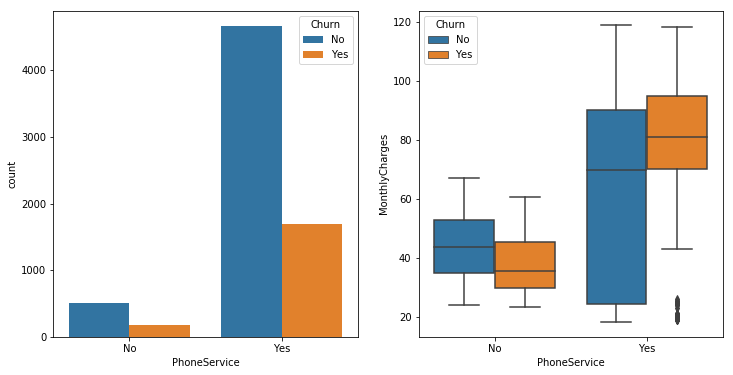

In [16]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
sns.countplot(x='PhoneService', hue='Churn', data=telco, ax=ax1)
sns.boxplot(x='PhoneService', y='MonthlyCharges', hue='Churn', data=telco, ax=ax2)
plt.show()

###### Multiple Lines

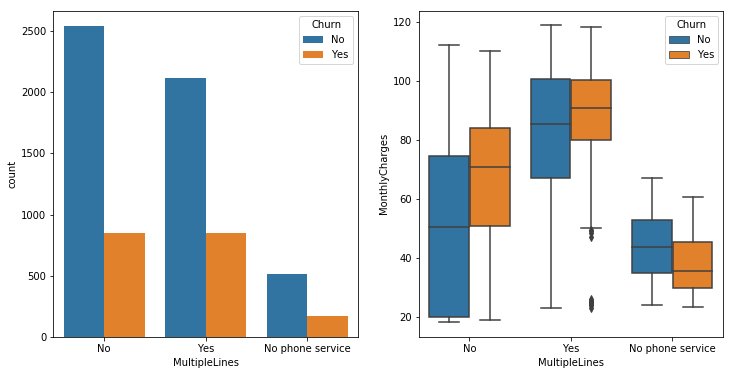

In [17]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
sns.countplot(x='MultipleLines', hue='Churn', data=telco, 
              order=['No','Yes','No phone service'], ax=ax1)
sns.boxplot(x='MultipleLines', y='MonthlyCharges', hue='Churn', 
               data=telco, order=['No','Yes','No phone service'], ax=ax2)
plt.show()

###### Internet Service

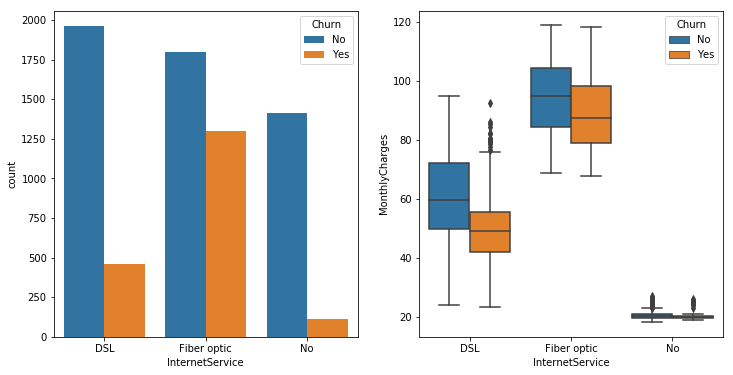

In [18]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
sns.countplot(x='InternetService', hue='Churn', data=telco, ax=ax1)
sns.boxplot(x='InternetService', y='MonthlyCharges', hue='Churn', 
               data=telco, ax=ax2)
plt.show()

###### Online Security

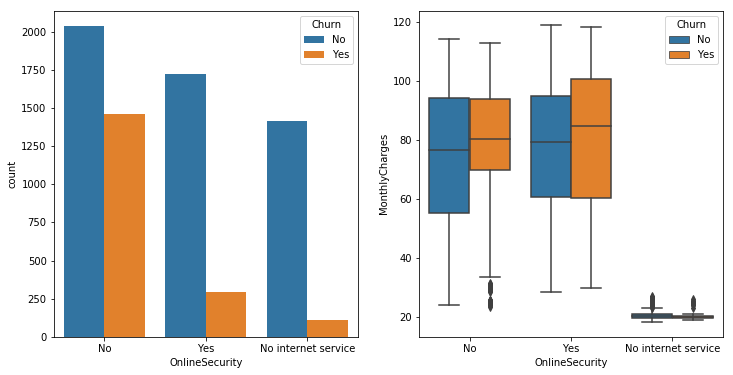

In [19]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
sns.countplot(x='OnlineSecurity', hue='Churn', data=telco, ax=ax1)
sns.boxplot(x='OnlineSecurity', y='MonthlyCharges', hue='Churn', 
               data=telco, ax=ax2)
plt.show()

###### Online Backup

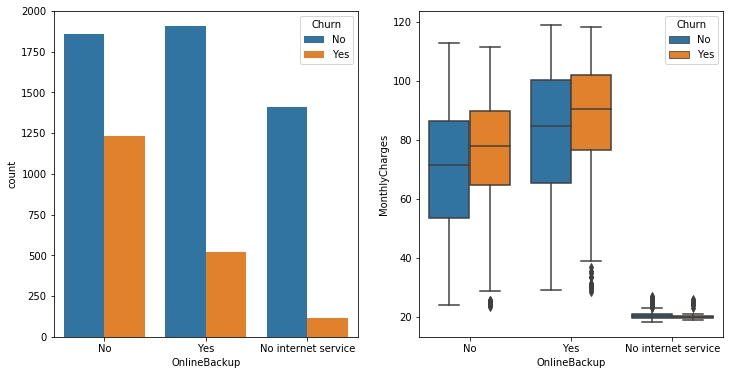

In [20]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
sns.countplot(x='OnlineBackup', hue='Churn', data=telco, 
              order=['No','Yes','No internet service'], ax=ax1)
sns.boxplot(x='OnlineBackup', y='MonthlyCharges', hue='Churn', 
               data=telco, order=['No','Yes','No internet service'], 
               ax=ax2)
plt.show()

###### Device Protection

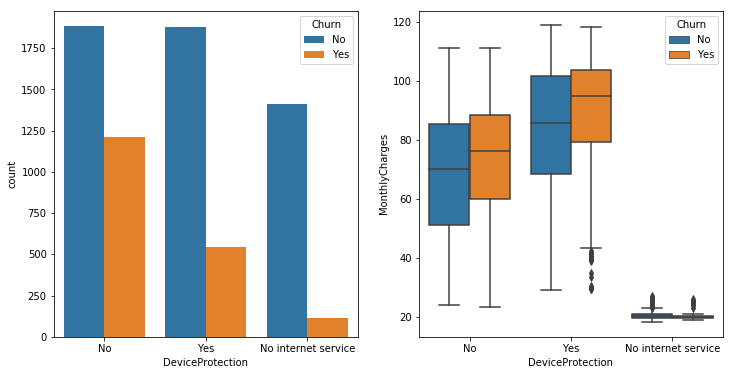

In [21]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
sns.countplot(x='DeviceProtection', hue='Churn', data=telco, ax=ax1)
sns.boxplot(x='DeviceProtection', y='MonthlyCharges', hue='Churn', 
               data=telco, ax=ax2)
plt.show()

###### Tech Support

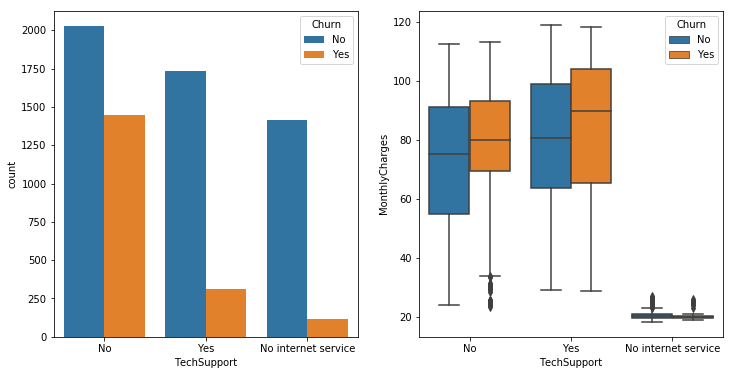

In [22]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
sns.countplot(x='TechSupport', hue='Churn', data=telco, ax=ax1)
sns.boxplot(x='TechSupport', y='MonthlyCharges', hue='Churn', 
               data=telco, ax=ax2)
plt.show()

###### Streaming TV

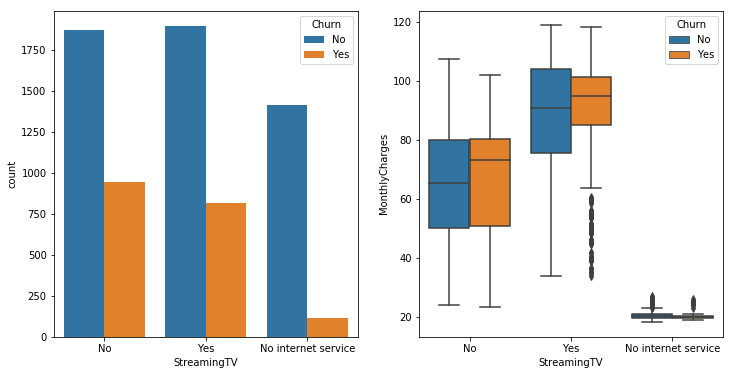

In [23]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
sns.countplot(x='StreamingTV', hue='Churn', data=telco, ax=ax1)
sns.boxplot(x='StreamingTV', y='MonthlyCharges', hue='Churn', 
               data=telco, ax=ax2)
plt.show()

###### Streaming Movies

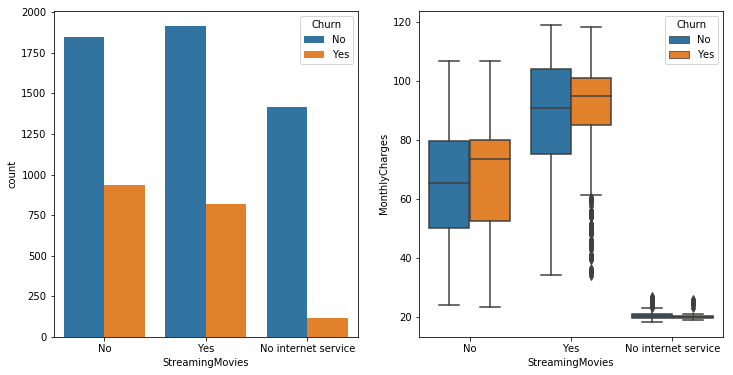

In [24]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
sns.countplot(x='StreamingMovies', hue='Churn', data=telco, ax=ax1)
sns.boxplot(x='StreamingMovies', y='MonthlyCharges', hue='Churn', 
               data=telco, ax=ax2)
plt.show()

----------------
## Churn Among Customers Based on Tenure, Payments, Payment Methods, and Other Factors

###### Can any correlations be quickly spotted in the data using various plots?

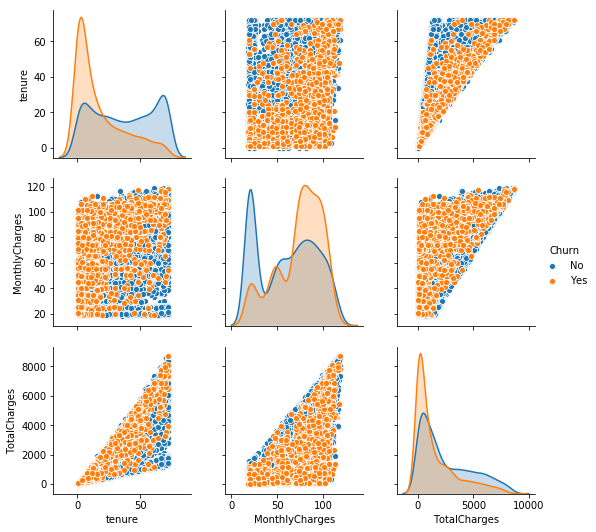

In [25]:
sns.pairplot(telco, hue='Churn')
plt.show()

Based on the distributions along the diagonal, churn appears concentrated among customers with low tenure and monthly charges more than ~$60/mo.

###### How do customers make payments and are some payment methods more susceptible to churn?

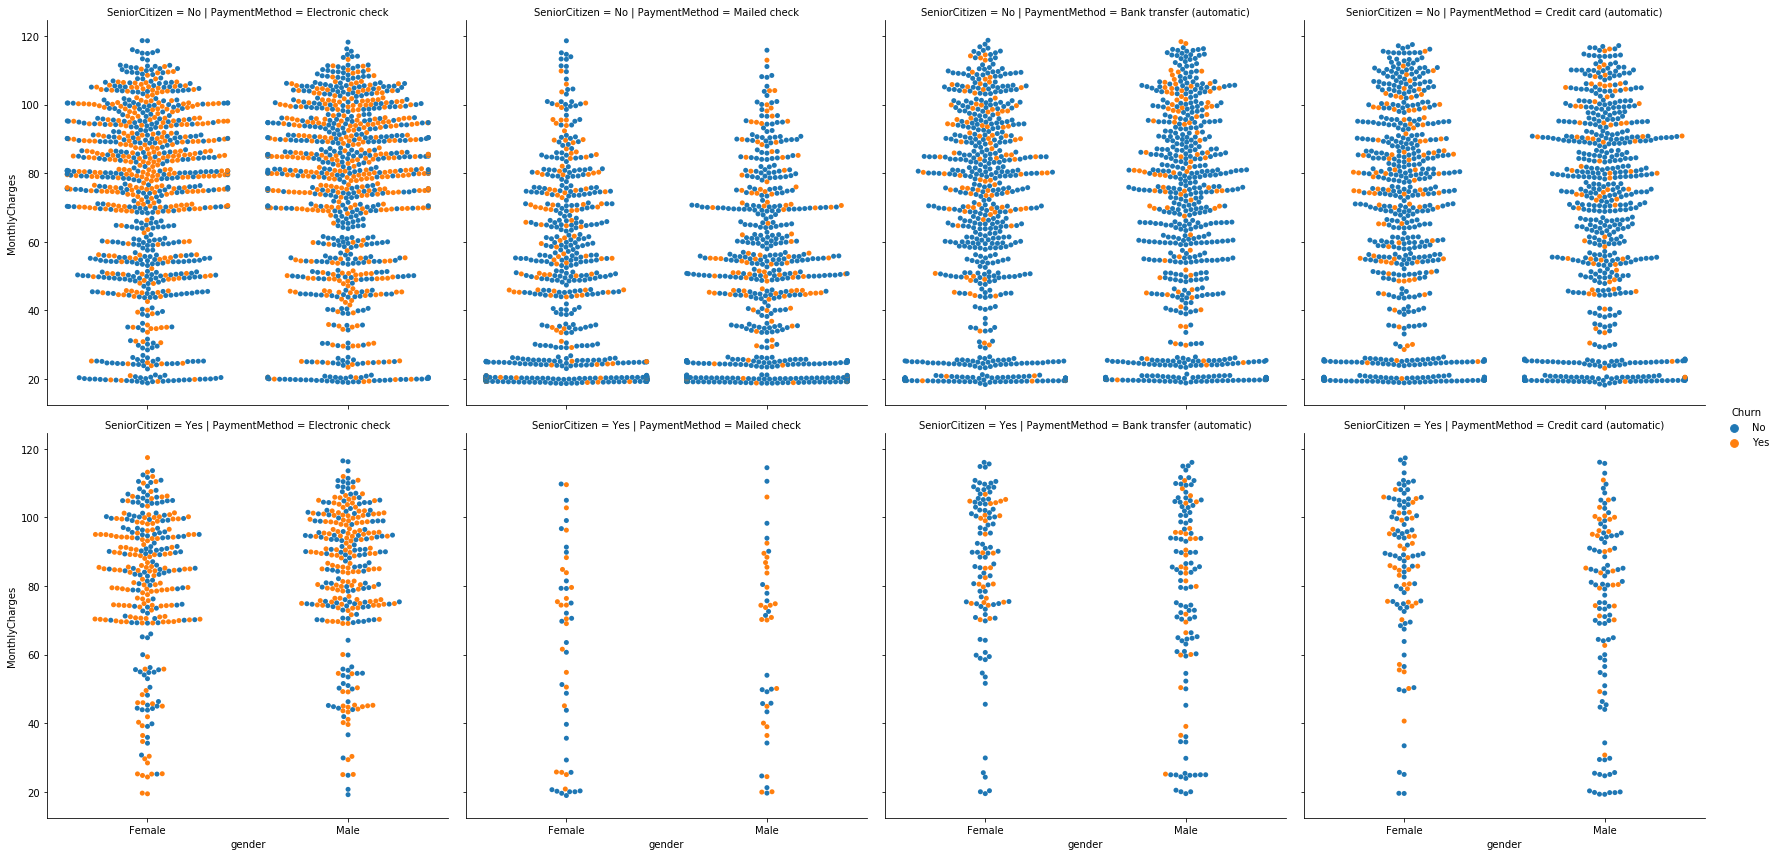

In [26]:
sns.catplot(x='gender', y='MonthlyCharges', hue='Churn', 
            col='PaymentMethod', row='SeniorCitizen', 
            data=telco, kind='swarm', height=6)
plt.show()

Most churn is concentrated among clients paying by electronic check.  Gender does not appear to be a significant factor in churn.

###### How concentrated is churn among customers paying month-to-month versus those with contracts?

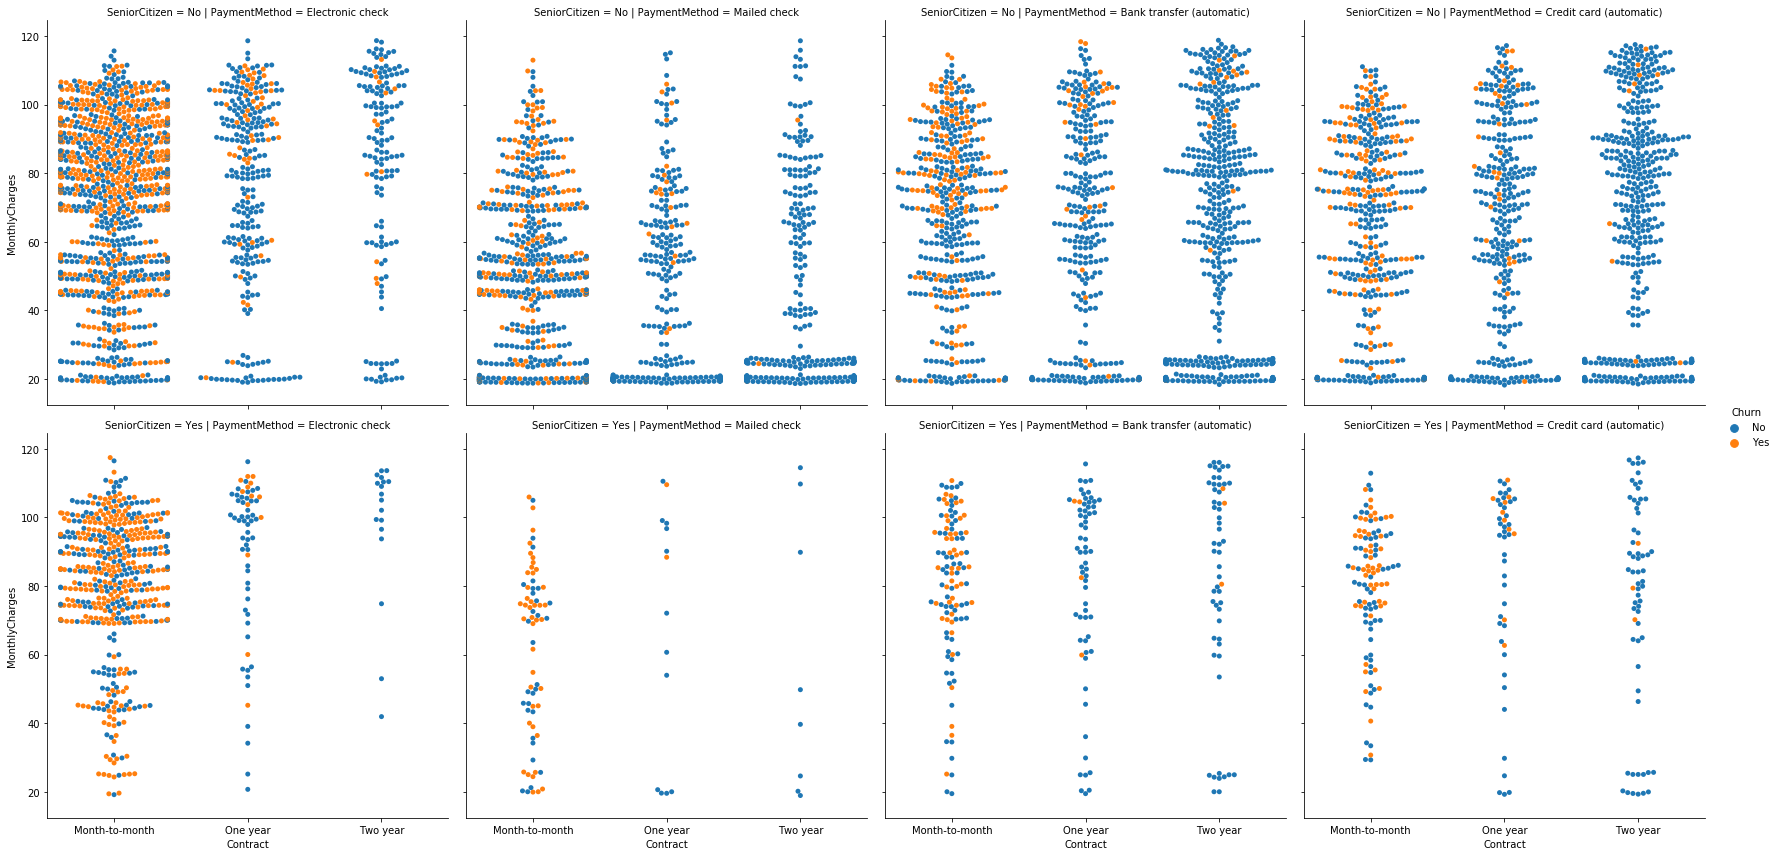

In [27]:
sns.catplot(x='Contract', y='MonthlyCharges', hue='Churn', 
            col='PaymentMethod', row='SeniorCitizen', 
            data=telco, kind='swarm', height=6)
plt.show()

Among all contract/non-contract categories, more churn is concentrated among those paying month-to-month.

###### Is there a visible difference in churn between customers with/without dependents?

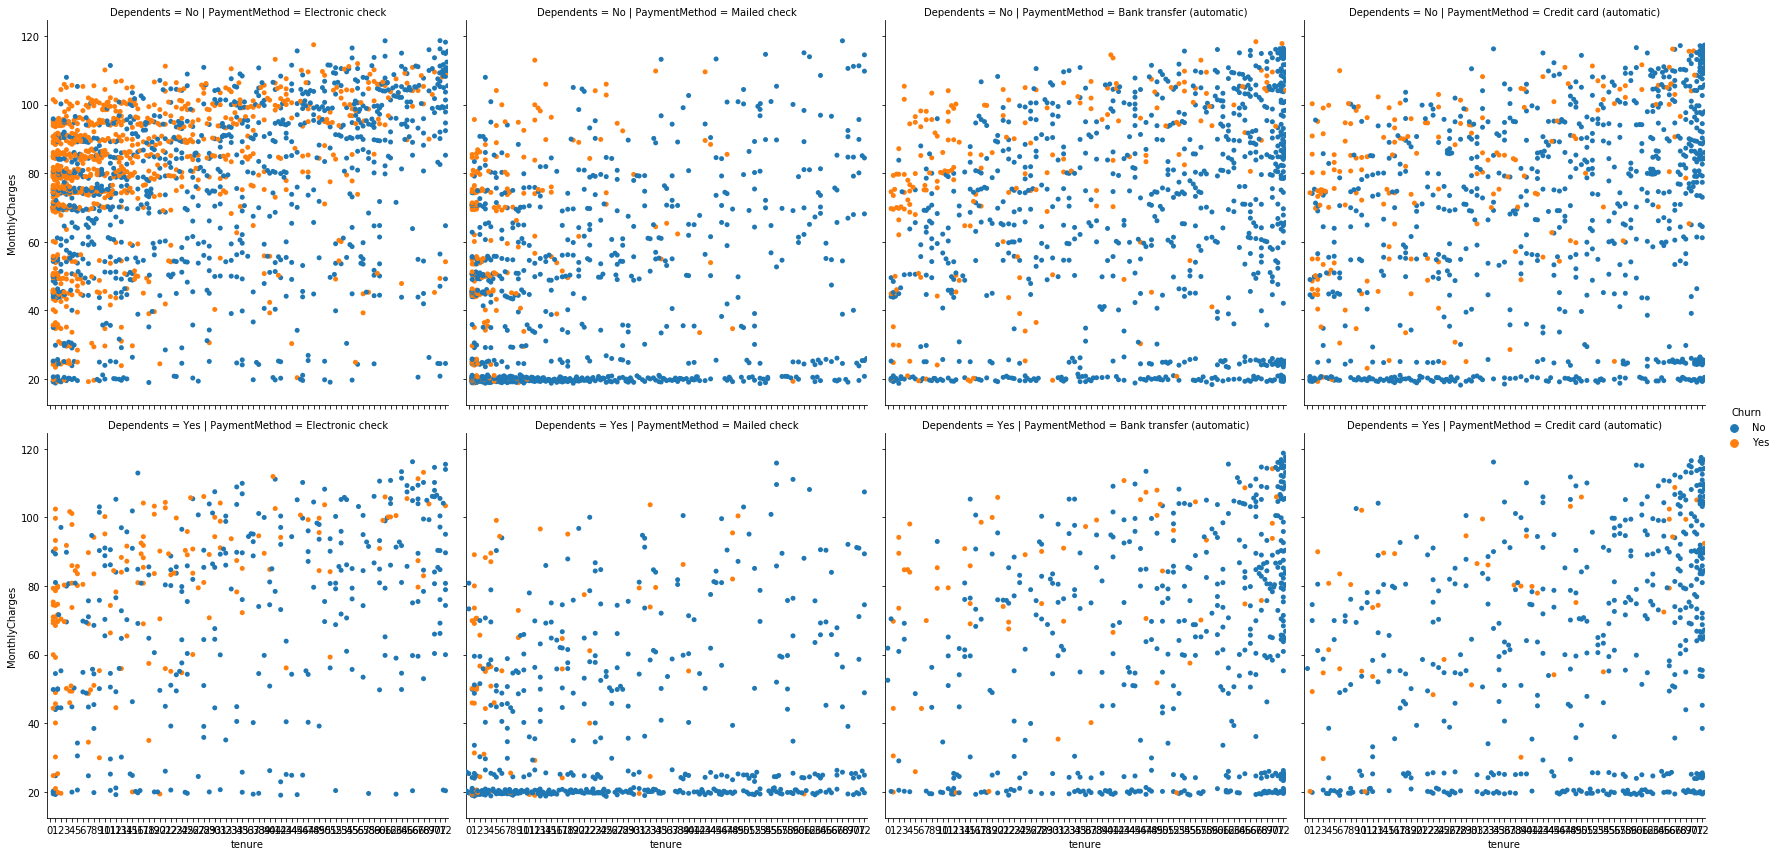

In [28]:
sns.catplot(x='tenure', y='MonthlyCharges', hue='Churn', 
            col='PaymentMethod', row='Dependents', 
            data=telco, kind='swarm', height=6)
plt.show()

A lot of churn appears among customers *without* dependents.

------------------
- ## Visualization Takeaways
> ### The plots above show that a large amount of churn (in orange color) occurs among clients *without dependents*, paying *more than USD ~60/mo* by *electronic check* and on a *month-to-month basis*.  Tenure also plays a role with churn appearing more concentrated among people that have been customers for less than 2-3 years.  Whether the clients are senior citizens or male/female does *not* seem to be a significant factor.

----------------------
# T-Tests

### What are some characteristics of different customer groups in the dataset that may indicate a high risk of churn?

----------------------
## Comparison 1
###### Create population variables to compare

In [29]:
# Former customers that paid month-to-month
pop_mtm_churn_monthly = telco[(telco['Contract'] == 'Month-to-month') & 
                                      (telco['Churn'] == 'Yes')]['MonthlyCharges']

# Current customers paying month-to-month
pop_mtm_stay_monthly = telco[(telco['Contract'] == 'Month-to-month') & 
                                     (telco['Churn'] == 'No')]['MonthlyCharges']

###### Size of populations

In [30]:
len(pop_mtm_churn_monthly)

1655

In [31]:
len(pop_mtm_stay_monthly)

2220

###### Means of populations

In [32]:
pop_mtm_churn_monthly.mean()

73.01939577039273

In [33]:
pop_mtm_stay_monthly.mean()

61.4626351351351

###### Run t-tests (10,000 iterations)

In [34]:
t_stats = []
p_vals = []
for i in range(10000):
    
    # Sample sizes close to 10% of population sizes
    sample_mtm_churn = np.random.choice(pop_mtm_churn_monthly, 166, replace=False)
    sample_mtm_stay = np.random.choice(pop_mtm_stay_monthly, 222, replace=False)

    ttest = ttest_ind(sample_mtm_churn, sample_mtm_stay, equal_var=False)
    
    t_stats.append(ttest.statistic)
    p_vals.append(ttest.pvalue)

###### Average of t-tests

In [35]:
np.mean(t_stats)

4.390758768448431

###### Average of p-values

In [36]:
np.mean(p_vals)

0.0016748872082551444

- ## Comparison 1 Takeaway:
> ### The low p-value above means that we can say with more than 99% confidence that the compared variables come from populations that exhibit different behavior / characteristics.  When we consider that the group that churned was also paying more (on average) on a monthly basis, this analysis makes sense.

--------------
## Comparison 2
###### Create population variables to compare

In [37]:
# Former customers that paid month-to-month and did not have various services
pop_churned_tech_svcs_no = telco[(telco['Contract'] == 'Month-to-month') & 
                             (telco['OnlineSecurity'] == 'No') & 
                             (telco['OnlineBackup'] == 'No') & 
                             (telco['DeviceProtection'] == 'No') & 
                             (telco['TechSupport'] == 'No') & 
                             (telco['Churn'] == 'Yes')]['MonthlyCharges']

# Current customers that pay month-to-month without various services
pop_stayed_tech_svcs_no = telco[(telco['Contract'] == 'Month-to-month') & 
                            (telco['OnlineSecurity'] == 'No') & 
                            (telco['OnlineBackup'] == 'No') & 
                            (telco['DeviceProtection'] == 'No') & 
                            (telco['TechSupport'] == 'No') & 
                            (telco['Churn'] == 'No')]['MonthlyCharges']

###### Size of populations

In [38]:
len(pop_churned_tech_svcs_no)

704

In [39]:
len(pop_stayed_tech_svcs_no)

499

###### Means of populations

In [40]:
pop_churned_tech_svcs_no.mean()

70.79602272727274

In [41]:
pop_stayed_tech_svcs_no.mean()

63.64048096192384

###### Run t-tests (10,000 iterations)

In [42]:
t_stats = []
p_vals = []
for i in range(10000):
    
    # Sample sizes close to 10% of population sizes
    sample_mtm_churn = np.random.choice(pop_churned_tech_svcs_no, 70, replace=False)
    sample_mtm_stay = np.random.choice(pop_stayed_tech_svcs_no, 50, replace=False)

    ttest = ttest_ind(sample_mtm_churn, sample_mtm_stay, equal_var=False)
    
    t_stats.append(ttest.statistic)
    p_vals.append(ttest.pvalue)

###### Average of t-tests

In [43]:
np.mean(t_stats)

2.0124982659055655

###### Average of p-values

In [44]:
np.mean(p_vals)

0.14042553501193114

- ## Comparison 2 Takeaway:
> ### The relatively high p-value above indicates that we cannot be even 86% confident that the groups being compared come from different populations.  Put in context, it indicates there may be heightened risk that some current customers that pay month-to-month (without various services) will consider leaving.  One might expect this risk to increase with higher monthly payments.

--------------
## Comparison 3
###### Create population variables to compare

In [45]:
# Former customers that paid more than $60/mo on a month-to-month basis
pop_mtm_churn_gt_60_monthly = telco[(telco['Contract'] == 'Month-to-month') & 
                                      (telco['MonthlyCharges'] > 60) & 
                                      (telco['Churn'] == 'Yes')]['MonthlyCharges']

# Current customers that pay more than $60/mo on a month-to-month basis
pop_mtm_stay_gt_60_monthly = telco[(telco['Contract'] == 'Month-to-month') & 
                                     (telco['MonthlyCharges'] > 60) & 
                                     (telco['Churn'] == 'No')]['MonthlyCharges']

###### Size of populations

In [46]:
len(pop_mtm_churn_gt_60_monthly)

1204

In [47]:
len(pop_mtm_stay_gt_60_monthly)

1178

###### Means of populations

In [48]:
pop_mtm_churn_gt_60_monthly.mean()

85.79514119601332

In [49]:
pop_mtm_stay_gt_60_monthly.mean()

84.2384550084891

###### Run t-tests (10,000 iterations)

In [50]:
t_stats = []
p_vals = []
for i in range(10000):
    
    # Sample sizes close to 10% of population sizes
    sample_mtm_churn = np.random.choice(pop_mtm_churn_gt_60_monthly, 120, replace=False)
    sample_mtm_stay = np.random.choice(pop_mtm_stay_gt_60_monthly, 118, replace=False)

    ttest = ttest_ind(sample_mtm_churn, sample_mtm_stay, equal_var=False)
    
    t_stats.append(ttest.statistic)
    p_vals.append(ttest.pvalue)

###### Average of t-tests

In [51]:
np.mean(t_stats)

0.9931712267202094

###### Average of p-values

In [52]:
np.mean(p_vals)

0.3726082462994494

- ## Comparison 3 Takeaway:
> ### The average p-value above indicates that we cannot state with much confidence that there is any meaningful difference between the groups being compared (former customers that were paying more than USD 60/mo month-to-month vs. current customers paying more than USD 60/mo month-to-month).  This would suggest that current customers paying more than USD 60/mo on a month-to-month basis are at a higher risk of leaving than when we compare customer populations grouped by some other metrics.

------------------
# Research / Sales / Retention Proposal

-----------------
## *Experimental Hypothesis*

> ### Current customers paying more than USD 60/month on a month-to-month payment plan may be at high risk of leaving Telco.  The data shows this to be the case with a group of former customers that left under similar circumstances.  Proactive steps should be taken to incentivize these customers to stay, which will provide Telco with a more reliable stream of revenue.

> ### Below are some proposals designed to encourage more customers to sign a one-year or two-year contract OR stay with Telco longer by paying less on a month-to-month basis:

> ### For customers paying more than USD 60/month on a month-to-month basis, make them aware of some current deals:
> - ### Option 1 (DEFAULT:  Monthly bill is reduced by USD 5/mo):
    - No questions asked and nothing is required of the customer.  The customer's monthly bill is reduced by USD 5/mo IF they would like to keep paying month-to-month, OR
> - ### Option 2 (One-year contract):
    - In return for signing a **one-year contract**, the customer can choose from:
        - **Adding two (2) Telco services** to their plan **and** their **monthly bill being reduced by USD 7.50/mo**, OR
        - Adding no additional services, but their **monthly bill is reduced by USD 10/mo**, OR
> - ### Option 3 (Two-year contract):
    - In return for signing a **two-year contract**, the customer can choose from:
        - **Adding three (3) Telco services** to their plan **and** their **monthly bill being reduced by USD 10/mo**, OR
        - Adding no additional services, but their **monthly bill is reduced by USD 15/mo**

-----------------
## *Rollout Plan*

> ### Initial:  Over the course of one month, randomly select and contact 10% of the group of customers paying more than USD 60/month on a month-to-month basis and make them aware of the options above.

> ### Follow-up:  Monitor this initial test group for three (3) months and consider expanding the rollout in month 4 to an additional 40% of (> USD 60/mo, month-to-month) customers.

-----------------
## *Evaluation Plan*

> ### After nine (9) months, evaluate the early results of the initial and follow-up test groups to determine what portion of customers that received the promotional offers:
 - Left Telco,
 - Decided to remain on month-to-month payment plans,
 - Converted to a one-year contract,
 - Converted to a two-year contract
 
> ### Compare the results of these test groups with retention/conversion rates of (> USD 60/mo, month-to-month) customers that did not receive the promotional offers.

> ### Evaluate again after 15 months and determine whether Telco will benefit from a full rollout to this group of customers.

> ### Success will be measured by whether Telco was able to curtail churn and/or increase the number of one-year and two-year contract sign-ups in a manner that builds/fortifies a more reliable stream of revenue and ensures healthy(ier) profit margins in the future.